<div style='background-image: url("./title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">The Pseudo-Spectral Method - Numerical Derivatives based on a Derivative Matrix</div>
        </div>
    </div>
</div>

This notebook covers the following aspects:
    
* Calculate derivative using the differentation theorem of the Fourier Transform 
* Define a function that initializes the Chebyshev derivative matrix $D_{ij}$  for a Gaussian function
* Compare with analytical solution


## Basic Equations

Calculating a derivative using the differentation theorem of the Fourier Transform is in the mathematical sense a convolution of the function $f(x)$ with $ik$, where $k$ is the wavenumber and $i$ the imaginary unit. This can also be formulated as a matrix-vector product involving so-called Toeplitz matrices. An elegant (but inefficient) way of performing a derivative operation on a space-dependent function described on the Chebyshev collocation points is by defining a derivative matrix $D_{ij}$

$$
\begin{align}
D_{ij} &=-\frac{2 N^2 + 1}{6} &\text{for }  i  = j = N \\
D_{ij} &=-\frac{1}{2} \frac{x_i}{1-x_i^2} &\text{for } i = j = 1, 2, \dots, N-1 \\
D_{ij} &=\frac{c_i}{c_j} \frac{(-1)^{i+j}}{x_i - x_j} &\text{for } i \neq j = 0, 1, \dots, N
\end{align}
$$

where $N+1$ is the number of Chebyshev collocation points $ \ x_i = cos(i\pi / N)$, $ \ i=0,...,N$ and the $c_i$ are given as

$$ 
\begin{align}
c_i &= 2 \hspace{1.5cm} \text{for  i  = 0 or N} \\
c_i &= 1 \hspace{1.5cm} \text{otherwise} 
\end{align}
$$

This differentiation matrix allows us to write the derivative of the function $f_i = f(x_i)$ (possibly depending on time) simply as

$$\partial_x u_i = D_{ij} \ u_j,$$

where the right-hand side is a matrix-vector product, and the Einstein summation convention applies.

In [1]:
# This is a configuration step for the exercise. Please run it before calculating the derivative!
import numpy as np
import matplotlib
# Show Plot in The Notebook
# -----------------------
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Function for setting up the Chebyshev derivative matrix D_ij
def get_cheby_matrix(nx):
    cx = np.zeros(nx+1)
    x = np.zeros(nx+1)
    for ix in range(0,nx+1):
        x[ix] = np.cos(np.pi * ix  / nx)   # Chebyshev collocation points
   
    cx[0] = 2.
    cx[nx] = 2.
    cx[1:nx] = 1.
   
    D = np.zeros( (nx+1, nx+1) )
    for i in range(0, nx+1):
        for j in range(0, nx+1):
            if i==j and i!=0 and i!=nx:
                D[i, i] = -x[i] / (2.0 * (1.0 - x[i] * x[i]))
            else:
                D[i, j] = (cx[i] * (-1.)**(i+j)) / (cx[j] * (x[i]-x[j]))
  
    D[0, 0] = (2. * nx**2 + 1.)/6.
    D[nx, nx] = -D[0,0]  
    return D

The following cell defines an arbitrary function (e.g. a Gaussian), initializes its analytical derivative on the Chebyshev collocation points and calculates the numerical derivative and the difference to the analytical solution. 

In [4]:
# Initialize arbitrary test function on Chebyshev collocation points
nx = 200    # Number of grid points - can be modified
x = np.zeros(nx+1)
for ix in range(0, nx+1):
    x[ix] = np.cos(ix * np.pi / nx) # Chebyshev collocation points
dxmin = min(abs(np.diff(x)))
dxmax = max(abs(np.diff(x)))

# Function example: Gaussian
# Width of Gaussian
s = .2 
# Gaussian function 
f = np.exp(-1/s**2 * x**2)

# Analytical derivative
df_ana = -2/s**2 * x * np.exp(-1/s**2 * x**2)

# Initialize differentiation matrix
D = get_cheby_matrix(nx)

# Calculate numerical derivative using differentiation matrix D_{ij}
df_num = D @ f

df_err = (df_ana - df_num)

# Calculate error between analytical and numerical solution
err = np.sum((df_num - df_ana)**2) / np.sum(df_ana**2) * 100
print('Error: %s' %err)

Error: 1.801074449217052e-24


<IPython.core.display.Javascript object>


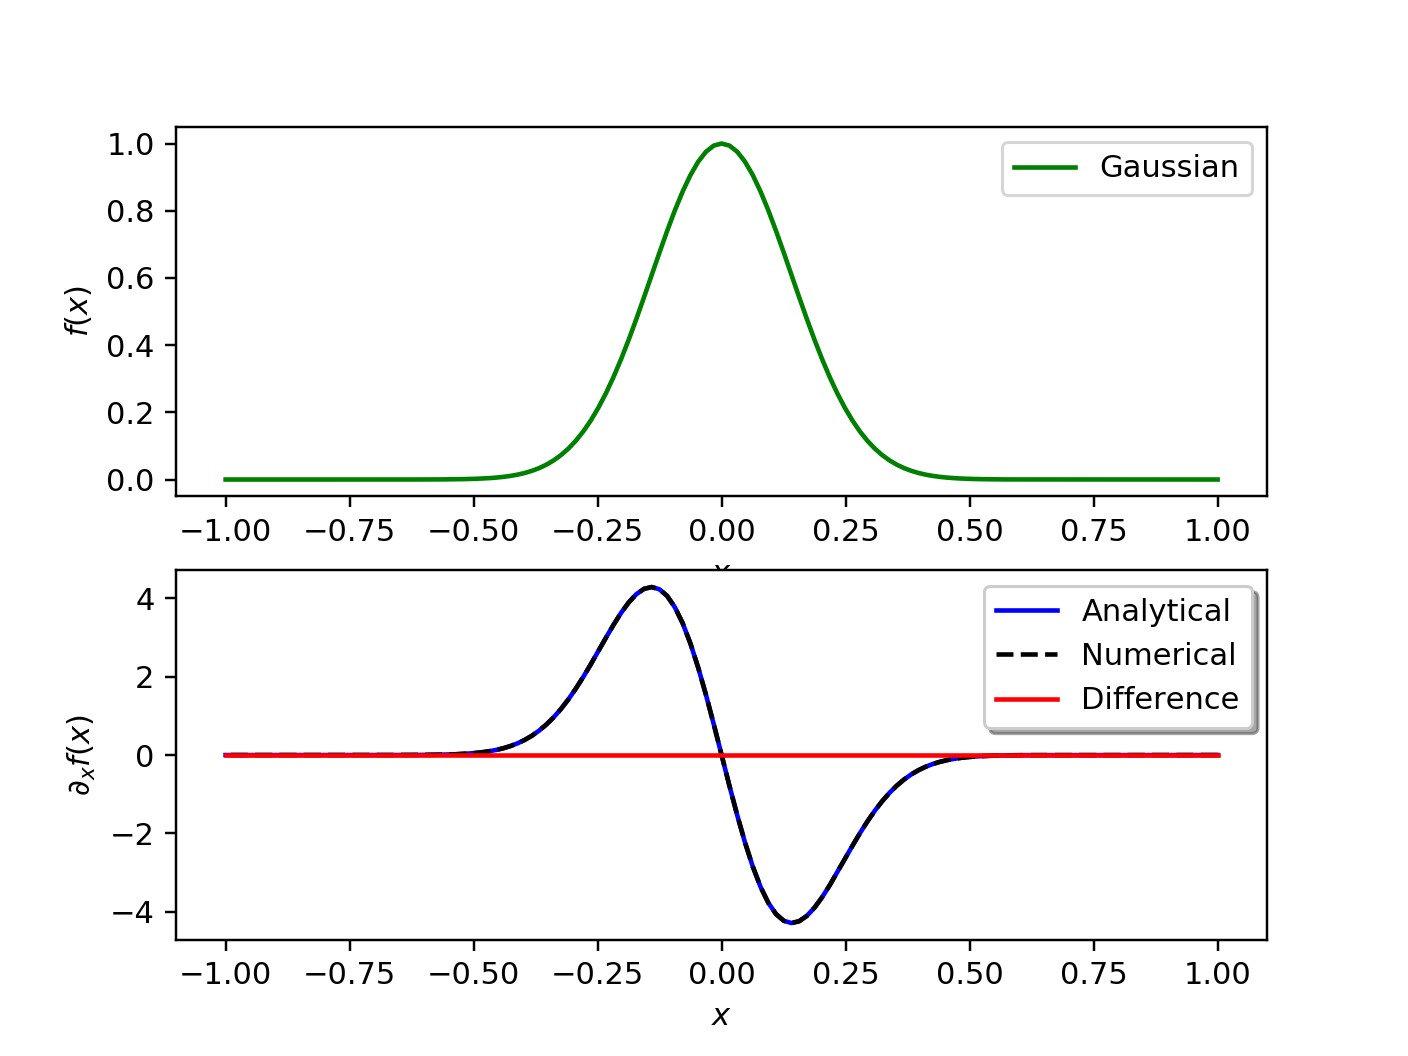

In [5]:
# ----------------------------------------------------------------
# Plot analytical and numerical derivatives
# ---------------------------------------------------------------

plt.subplot(2,1,1)
plt.plot(x, f, "g", lw = 1.5, label='Gaussian')
plt.legend(loc='upper right', shadow=False)
plt.xlabel('$x$')        
plt.ylabel('$f (x)$')

plt.subplot(2,1,2)
plt.plot(x, df_ana, "b", lw = 1.5, label='Analytical')
plt.plot(x, df_num, 'k--', lw = 1.5, label='Numerical')
plt.plot(x, df_err, "r", lw = 1.5, label='Difference')
plt.legend(loc='upper right', shadow=True)
plt.xlabel('$x$')        
plt.ylabel('$\partial_x f(x)$')

plt.show()